# Lecture 13: Dual Formulation of Support Vector Machines

In this lecture, we will see a different formulation of the SVM called the *dual*. This dual formulation will lead to new types of optimization algorithms with favorable computational properties in scenarios when the number of features is very large (and possibly even infinite!).

# 13.1. Lagrange Duality

Before we define the dual of the SVM problem, we need to introduce some additional concepts from optimization, namely Lagrange duality.

## 13.1.1. Review: Classification Margins

In the previous lecture, we defined the concept of classification margins. Recall that the margin $\gamma^{(i)}$ is the distance between the separating hyperplane and the datapoint $x^{(i)}$.
<center><img width=30% src="img/margin.png"></center>

Large margins are good, since data should be far from the decision boundary. Maximizing the margin of a linear model amounts to solving the following optimization problem:

\begin{align*}
\min_{\theta,\theta_0} \frac{1}{2}||\theta||^2 \; &  \\
\text{subject to } \; & y^{(i)}((x^{(i)})^\top\theta+\theta_0)\geq 1 \; \text{for all $i$}
\end{align*} 

We are now going to look at a different way of optimizing this objective. But first, we need to define Lagrange duality.

## 13.1.2. Lagrange Duality in Constrained Optimization

We start by introducing the definition of a constrained optimization problem. We will look at constrained optimization problems of the form
\begin{align*}
\min_{\theta \in \mathbb{R}^d} \; & J(\theta) \\
\text{such that } \; & c_k(\theta) \leq 0 \text{ for $k =1,2,\ldots,K$}
\end{align*}
where $J(\theta)$ is the optimization objective and each $c_k(\theta) : \mathbb{R}^d \to \mathbb{R}$ is a constraint.

Our goal is to find a small value of $J(\theta)$ such that the $c_k(\theta)$ are negative.
Rather than solving the above problem, we can solve the following related optimization problem, which contains additional penalty terms: 
$$\min_\theta \mathcal{L}(\theta, \lambda) = J(\theta) + \sum_{k=1}^K \lambda_k c_k(\theta)$$
This new objective includes an additional vector of *Lagrange multipliers* $\lambda \in [0, \infty)^K$, which are positive weights that we place on the constraint terms. We call $\mathcal{L}(\theta, \lambda)$ the *Lagrangian*. Observe that:

* If $\lambda_k \geq 0$, then we penalize large values of $c_k$
* For large enough $\lambda_k$, no $c_k$ will be positive---a valid solution.

Thus, penalties are another way of enforcing constraints.

### 13.1.2.1. The Primal Lagrange Form

Consider again our constrained optimization problem:
\begin{align*}
\min_{\theta \in \mathbb{R}^d} \; & J(\theta) \\
\text{such that } \; & c_k(\theta) \leq 0 \text{ for $k =1,2,\ldots,K$}
\end{align*}

We define its *primal Lagrange form* to be
$$\min_{\theta \in \mathbb{R}^d} \mathcal{P}(\theta) = \min_{\theta \in \mathbb{R}^d} \max_{\lambda \geq 0} \mathcal{L}(\theta, \lambda) = \min_{\theta \in \mathbb{R}^d} \max_{\lambda \geq 0} \left(J(\theta) + \sum_{k=1}^K \lambda_k c_k(\theta) \right)$$

These two forms have the same optimum $\theta^*$! The reason for this to be true can be proved consideringg the following:
$$\min_{\theta \in \mathbb{R}^d} \mathcal{P}(\theta) = \min_{\theta \in \mathbb{R}^d} \max_{\lambda \geq 0} \mathcal{L}(\theta, \lambda) = \min_{\theta \in \mathbb{R}^d} \max_{\lambda \geq 0} \left(J(\theta) + \sum_{k=1}^K \lambda_k c_k(\theta) \right)$$

Observe that:
* If a $c_k$ is violated ($c_k > 0$) then $\max_{\lambda \geq 0} \mathcal{L}(\theta, \lambda)$ is $\infty$ as $\lambda_k \to \infty$.

* If no $c_k$ is violated and $c_k < 0$ then the optimal $\lambda_k = 0$ (any bigger value makes the inner objective smaller).
    * If $c_k < 0$ for all $k$ then $\lambda_k=0$ for all $k$ and
    $$\min_{\theta \in \mathbb{R}^d} \mathcal{P}(\theta) = \min_{\theta \in \mathbb{R}^d} \max_{\lambda \geq 0} \mathcal{L}(\theta, \lambda) = \min_{\theta \in \mathbb{R}^d} J(\theta)$$

Thus, $\min_{\theta \in \mathbb{R}^d} \mathcal{P}(\theta)$ is the solution to our original optimization problem.

### 13.1.2.2. The Dual Lagrange Form

Now consider the following problem over $\lambda\geq 0$:
$$\max_{\lambda \geq 0}\mathcal{D}(\lambda) = \max_{\lambda \geq 0} \min_{\theta \in \mathbb{R}^d} \mathcal{L}(\theta, \lambda) = \max_{\lambda \geq 0} \min_{\theta \in \mathbb{R}^d} \left(J(\theta) + \sum_{k=1}^K \lambda_k c_k(\theta) \right).$$

We call this the *Lagrange dual* of the primal optimization problem $\min_{\theta \in \mathbb{R}^d} \mathcal{P}(\theta)$. We can always construct a dual for the primal.

### 13.1.2.3. Lagrange Duality

Once we have constructed a dual for the primal, the dual would be interesting because we always have:
$$ \max_{\lambda \geq 0}\mathcal{D}(\lambda) = \max_{\lambda \geq 0} \min_{\theta \in \mathbb{R}^d} \mathcal{L}(\theta, \lambda) \leq \min_{\theta \in \mathbb{R}^d} \max_{\lambda \geq 0} \mathcal{L}(\theta, \lambda) = \min_{\theta \in \mathbb{R}^d} \mathcal{P}(\theta)$$

Moreover, in many cases, we have
$$ \max_{\lambda \geq 0}\mathcal{D}(\lambda) = \min_{\theta \in \mathbb{R}^d} \mathcal{P}(\theta).$$
Thus, the primal and the dual are equivalent! This is very imporant and we will use this feature for moving into the next steps of solving SVMs.

## 13.1.3. An Aside: Constrained Regularization

Before we move on to defining the dual form of SVMs, we want to make a brief side comment on the related topic of constrained regularization. Consider a regularized supervised learning problem with a penalty term:
$$ \min_{\theta \in \Theta} L(\theta) + \gamma \cdot R(\theta). $$

We may also enforce an explicit constraint on the complexity of the model:
\begin{align*}
\min_{\theta \in \Theta} \; & L(\theta) \\
\text{such that } \; & R(\theta) \leq \gamma'
\end{align*}
We will not prove this, but solving this problem is equivalent so solving the penalized problem for some $\gamma > 0$ that's different from $\gamma'$. In other words, we can regularize by explicitly enforcing $R(\theta)$ to be less than a value or we can penalize $R(\theta)$.

# 13.2. Dual Formulation of SVMs

Let's now apply Lagrange duality to support vector machines. 

## 13.2.1. Review: Max-Margin Classification

First, let's briefly reintroduce the task of binary classification, with a linear model optimizing a max-margin objective.

Consider a training dataset $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$. We distinguish between two types of supervised learning problems depnding on the targets $y^{(i)}$. 

1. __Regression__: The target variable $y \in \mathcal{Y}$ is continuous:  $\mathcal{Y} \subseteq \mathbb{R}$.
2. __Binary Classification__: The target variable $y$ is discrete and takes on one of $K=2$ possible values.

In this lecture, we assume $\mathcal{Y} = \{-1, +1\}$. We will also work with linear models of the form:
\begin{align*}
f_\theta(x) & = \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + ... + \theta_d \cdot x_d
\end{align*}
where $x \in \mathbb{R}^d$ is a vector of features and $y \in \{-1, 1\}$ is the target. The $\theta_j$ are the *parameters* of the model.

We can represent the model in a vectorized form
\begin{align*}
f_\theta(x) = \theta^\top x + \theta_0.
\end{align*}

We define the *geometric* margin $\gamma^{(i)}$ with respect to a training example $(x^{(i)}, y^{(i)})$ as
$$ \gamma^{(i)} = y^{(i)}\left( \frac{\theta^\top x^{(i)} + \theta_0}{||\theta||} \right). $$
This also corresponds to the distance from $x^{(i)}$ to the hyperplane.

We saw that maximizing the margin of a linear model amounts to solving the following optimization problem.
\begin{align*}
\min_{\theta,\theta_0} \frac{1}{2}||\theta||^2 \; &  \\
\text{subject to } \; & y^{(i)}((x^{(i)})^\top\theta+\theta_0)\geq 1 \; \text{for all $i$}
\end{align*}

## 13.2.2. The Dual of the SVM Problem

Let's now derive the SVM dual. Consider the following objective, the Langrangian of the max-margin optimization problem.

\begin{align*}
L(\theta, \theta_0, \lambda) = \frac{1}{2}||\theta||^2 + \sum_{i=1}^n \lambda_i \left(1-y^{(i)}((x^{(i)})^\top\theta+\theta_0)\right)
\end{align*}

We have put each constraint inside the objective function and added a penalty $\lambda_i$ to it.

Recall that the following formula is the *Lagrange dual* of the primal optimization problem $\min_{\theta \in \mathbb{R}^d} \mathcal{P}(\theta)$. We can always construct a dual for the primal.
$$\max_{\lambda \geq 0}\mathcal{D}(\lambda) = \max_{\lambda \geq 0} \min_{\theta \in \mathbb{R}^d} \mathcal{L}(\theta, \lambda) = \max_{\lambda \geq 0} \min_{\theta \in \mathbb{R}^d} \left(J(\theta) + \sum_{k=1}^K \lambda_k c_k(\theta) \right).$$

It is easy to write out the dual form of the max-margin problem. Consider optimizing the above Lagrangian over $\theta, \theta_0$ for any value of $\lambda$.
$$\min_{\theta, \theta_0} L(\theta, \theta_0, \lambda) = \min_{\theta, \theta_0} \left( \frac{1}{2}||\theta||^2 + \sum_{i=1}^n \lambda_i \left(1-y^{(i)}((x^{(i)})^\top\theta+\theta_0)\right)\right)$$
This objective is quadratic in $\theta$; hence it has a single minimum in $\theta$.

We can find it by setting the derivative to zero and solving for $\theta, \theta_0$:
\begin{align*}
\theta & = \sum_{i=1}^n \lambda_i y^{(i)} x^{(i)} \\
0 & = \sum_{i=1}^n \lambda_i y^{(i)}
\end{align*}

Substituting this into the Langrangian we obtain the following expression for the dual $\max_{\lambda\geq 0} \mathcal{D}(\lambda) = \max_{\lambda\geq 0} \min_{\theta, \theta_0} L(\theta, \theta_0, \lambda)$:
\begin{align*}
\max_{\lambda} & \sum_{i=1}^n \lambda_i - \frac{1}{2} \sum_{i=1}^n \sum_{k=1}^n \lambda_i \lambda_k y^{(i)} y^{(k)} (x^{(i)})^\top x^{(k)}  \\
\text{subject to } \; & \sum_{i=1}^n \lambda_i y^{(i)} = 0 \\
& \lambda_i \geq 0 \; \text{for all $i$}
\end{align*}

## 13.2.3. Properties of SVM Duals

Recall that in general, we have:
$$ \max_{\lambda \geq 0}\mathcal{D}(\lambda) = \max_{\lambda \geq 0} \min_{\theta \in \mathbb{R}^d} \mathcal{L}(\theta, \lambda) \leq \min_{\theta \in \mathbb{R}^d} \max_{\lambda \geq 0} \mathcal{L}(\theta, \lambda) = \min_{\theta \in \mathbb{R}^d} \mathcal{P}(\theta)$$

In the case of the SVM problem, one can show that
$$ \max_{\lambda \geq 0}\mathcal{D}(\lambda) = \min_{\theta \in \mathbb{R}^d} \mathcal{P}(\theta).$$
Thus, the primal and the dual are equivalent!

We can also make several other observations about this dual:
\begin{align*}
\max_{\lambda} & \sum_{i=1}^n \lambda_i - \frac{1}{2} \sum_{i=1}^n \sum_{k=1}^n \lambda_i \lambda_k y^{(i)} y^{(k)} (x^{(i)})^\top x^{(k)}  \\
\text{subject to } \; & \sum_{i=1}^n \lambda_i y^{(i)} = 0 \;\text{and}\; \lambda_i \geq 0 \; \text{for all $i$}
\end{align*}

* This is a constrainted quadratic optimization problem.
* The number of variables $\lambda_i$ equals $n$, the number of data points.
* Objective only depends on products $(x^{(i)})^\top x^{(j)}$ (keep reading for more on this!)

### 13.2.3.1. When to Solve the Dual

An interesting question arises when we need to decide which optimization problem to solve: the dual or the primal.
In short, the deciding factor is the number of features (the dimensionality of $x$) relative to the number of datapoints:
* The dimensionality of the primal depends on the number of features. If we have a few features and many datapoints, we should use the primal.
* Conversely, if we have a lot of features, but fewer datapoints, we want to use the dual.

In the next lecture, we will see how we can use this property to solve machine learning problems with a very large number of features (even possibly infinite!).

# 13.3. Practical Considerations for SVM Duals

In this part, we will continue our discussion of the dual formulation of the SVM with additional practical details.

Recall that the the max-margin hyperplane can be formualted as the solution to the following *primal* optimization problem.
\begin{align*}
\min_{\theta,\theta_0} \frac{1}{2}||\theta||^2 \; &  \\
\text{subject to } \; & y^{(i)}((x^{(i)})^\top\theta+\theta_0)\geq 1 \; \text{for all $i$}
\end{align*}

The solution to this problem also happens to be given by the following *dual* problem:
\begin{align*}
\max_{\lambda} & \sum_{i=1}^n \lambda_i - \frac{1}{2} \sum_{i=1}^n \sum_{k=1}^n \lambda_i \lambda_k y^{(i)} y^{(k)} (x^{(i)})^\top x^{(k)}  \\
\text{subject to } \; & \sum_{i=1}^n \lambda_i y^{(i)} = 0 \\
& \lambda_i \geq 0 \; \text{for all $i$}
\end{align*}

## 13.3.1. Non-Separable Problems

Our dual problem assumes that a separating hyperplane exists. If it doesn't, our optimization problem does not have a solution, and we need to modify it.
Our approach is going to be to make each constraint "soft", by introducing "slack" variables, which allow the constraint to be violated.
$$
y^{(i)}((x^{(i)})^\top\theta+\theta_0)\geq 1 - \xi_i.
$$

In the optimization problem, we assign a penalty $C$ to these slack variables to obtain:
\begin{align*}
\min_{\theta,\theta_0, \xi}\; & \frac{1}{2}||\theta||^2 + C \sum_{i=1}^n \xi_i \;  \\
\text{subject to } \; & y^{(i)}((x^{(i)})^\top\theta+\theta_0)\geq 1 - \xi_i \; \text{for all $i$} \\
& \xi_i \geq 0
\end{align*}

This is the primal problem. Let's now form its dual. First, the Lagrangian $L(\lambda, \mu,\theta,\theta_0,\xi)$ equals
\begin{align*}
\frac{1}{2}||\theta||^2 + C \sum_{i=1}^n \xi_i - \sum_{i=1}^n \lambda_i \left(y^{(i)}((x^{(i)})^\top\theta+\theta_0)- 1\right) - \sum_{i=1}^n \mu_i\xi_i.
\end{align*}

The dual objective of this problem will equal 
$$\mathcal{D}(\lambda, \mu) = \min_{\theta,\theta_0,\xi} L(\lambda, \mu,\theta,\theta_0,\xi).$$

As earlier, we can solve for the optimal $\theta, \theta_0$ in closed form and plug back the resulting values into the objective. 
We can then show that the dual takes the following form:
\begin{align*}
\max_{\lambda} & \sum_{i=1}^n \lambda_i - \frac{1}{2} \sum_{i=1}^n \sum_{k=1}^n \lambda_i \lambda_k y^{(i)} y^{(k)} (x^{(i)})^\top x^{(k)}  \\
\text{subject to } \; & \sum_{i=1}^n \lambda_i y^{(i)} = 0 \\
& C \geq \lambda_i \geq 0 \; \text{for all $i$}
\end{align*}

## 13.3.2. Sequential Minimal Optimization and Coordinate Descent

Coordinate descent is a general way to optimize functions $f(x)$ of multiple variables $x \in \mathbb{R}^d$. It excutes as:

1. Choose a dimension $j \in \{1,2,\ldots,d\}$.
2. Optimize $f(x_1, x_2, \ldots, x_j, \ldots, x_d)$ over $x_j$ while keeping the other variables fixed.

Here, we visualize coordinate descent applied to a 2D quadratic function.
<center><img width=50% src="img/coordinate_descent.png"></center>
The red line shows the trajectory of coordinate descent. Each "step" in the trajectory is an iteration of the algorithm. Image from Wikipedia.

We can apply a form of coordinate descent to solve the dual:
\begin{align*}
\max_{\lambda} & \sum_{i=1}^n \lambda_i - \frac{1}{2} \sum_{i=1}^n \sum_{k=1}^n \lambda_i \lambda_k y^{(i)} y^{(k)} (x^{(i)})^\top x^{(k)}  \\
\text{subject to } \; & \sum_{i=1}^n \lambda_i y^{(i)} = 0 \;\text{and}\; C \geq \lambda_i \geq 0 \; \text{for all $i$}
\end{align*}

A popular, efficient algorithm is Sequential Minimal Optimization (SMO), which executes as:
* Take a pair $\lambda_i, \lambda_j$, possibly using heuristics to guide choice of $i,j$.
* Reoptimize over $\lambda_i, \lambda_j$ while keeping the other variables fixed.
* Repeat the above until convergence.

## 13.3.3. Obtaining a Primal Solution from the Dual

Next, assuming we can solve the dual, how do we find a separating hyperplane $\theta, \theta_0$?

Recall that we already found an expression for the optimal $\theta^*$ (in the separable case) as a function of $\lambda$:
$$
\theta^* = \sum_{i=1}^n \lambda_i y^{(i)} x^{(i)}.
$$

Once we know $\theta^*$ it easy to check that the solution to $\theta_0$ is given by
$$
\theta_0^* = -\frac{\max_{i:y^{(i)}=-1} (\theta^*)^\top x^{(i)} + \min_{i:y^{(i)}=-1} (\theta^*)^\top x^{(i)}}{2}.
$$

## 13.3.4. Support Vectors

A powerful property of the SVM dual is that at the optimum, most variables $\lambda_i$ are zero! Thus, $\theta$ is a sum of a small number of points:
$$
\theta^* = \sum_{i=1}^n \lambda_i y^{(i)} x^{(i)}.
$$

The points for which $\lambda_i > 0$ are precisely the points that lie on the margin (are closest to the hyperplane). 

These are called *support vectors*, and this is where the SVM algorithm takes its name. We are going to illustrate the concept of an SVM using a figure.

## 13.3.5. A Hands-On Example

Let's look at a concrete example of how to use the dual version of the SVM. In this example, we are going to again use the Iris flower dataset. We will merge two of the three classes to make it suitable for binary classification.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris(as_frame=True)
iris_X, iris_y = iris.data, iris.target

# subsample to a third of the data points
iris_X = iris_X.loc[::4]
iris_y = iris_y.loc[::4]

# create a binary classification dataset with labels +/- 1
iris_y2 = iris_y.copy()
iris_y2[iris_y2==2] = 1
iris_y2[iris_y2==0] = -1

# print part of the dataset
pd.concat([iris_X, iris_y2], axis=1).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,-1
4,5.0,3.6,1.4,0.2,-1
8,4.4,2.9,1.4,0.2,-1
12,4.8,3.0,1.4,0.1,-1
16,5.4,3.9,1.3,0.4,-1


Let's visualize this dataset.

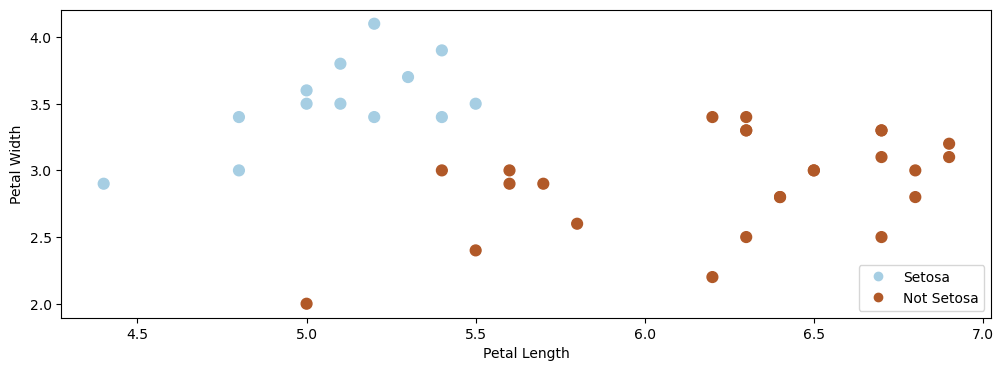

In [2]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]
import warnings
warnings.filterwarnings("ignore")

# create 2d version of dataset and subsample it
X = iris_X.to_numpy()[:,:2]
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

# Plot also the training points
p1 = plt.scatter(X[:, 0], X[:, 1], c=iris_y2, s=60, cmap=plt.cm.Paired)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Not Setosa'], loc='lower right')

We can run the dual version of the SVM by importing an implementation from `sklearn`:

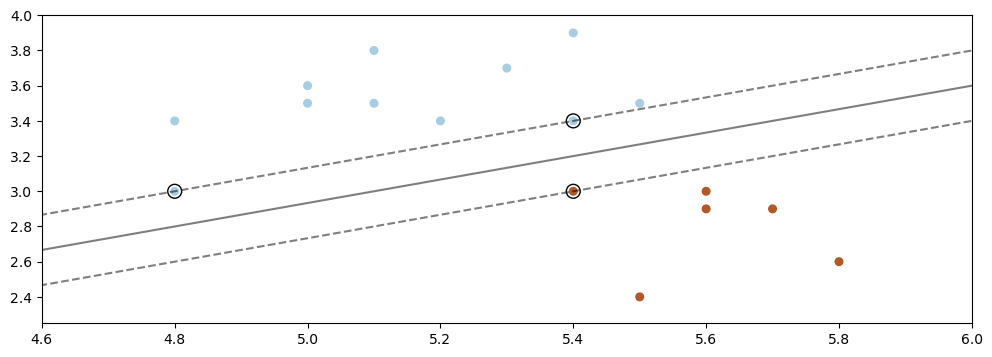

In [3]:
#https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
from sklearn import svm

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000) # this optimizes the dual
# clf = svm.LinearSVC() # this optimizes for the primal
clf.fit(X, iris_y2)

plt.scatter(X[:, 0], X[:, 1], c=iris_y2, s=30, cmap=plt.cm.Paired)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# plot decision boundary and margins
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.xlim([4.6, 6])
plt.ylim([2.25, 4])
plt.show()

We can see that the solid line defines the decision boundary, 
and the two dotted lines are the geometric margin. 

The data points that fall on the margin are the support vectors. Notice that only these vectors determine the position of the hyperplane. If we "wiggle" any of the other points, the margin remains unchanged---therefore the max-margin hyperplane also remains unchanged. However, moving the support vectors changes both the optimal margin and the optimal hyperplane. 

This observation provides an intuitive explanation for the formula
$$
\theta^* = \sum_{i=1}^n \lambda_i y^{(i)} x^{(i)}.
$$
In this formula, $\lambda_i > 0$ only for the $x^{(i)}$ that are support vectors. Hence, only these $x^{(i)}$ influence the position of the hyperplane, which matches our earlier intuition.

## 13.3.6. Algorithm: Support Vector Machine Classification (Dual Form)

In summary, the SVM algorithm can be succinctly defined by the following key components.

* __Type__: Supervised learning (binary classification)
* __Model family__: Linear decision boundaries.
* __Objective function__: Dual of SVM optimization problem.
* __Optimizer__: Sequential minimial optimization.
* __Probabilistic interpretation__: No simple interpretation!

In the next lecture, we will combine dual SVMs with a new idea called kernels, which enable them to handle a very large number of features (and even an infinite number of features) without any additional computational cost.